In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import os

In [11]:
def convert_to_alphaXY(theta,phi):
    A = np.sqrt(1+np.tan(phi)**2)
    if math.pi/2 < phi <= 3*math.pi/2:
        ZX = - np.arctan(np.tan(theta)/A)
        ZY = - np.arctan(np.tan(theta)*np.tan(phi)/A)
    else:
        ZX = np.arctan(np.tan(theta)/A)
        ZY = np.arctan(np.tan(theta)*np.tan(phi)/A)
    return(ZX,ZY)

def calculate_impact_to_object(dist_to_object,bursts,PosXX,PosYY,Theta,Phi):
    AngXX,AngYY = convert_to_alphaXY(Theta,Phi)
    #calculate intermediate point
    a = PosXX - dist_to_object * np.tan(AngXX)
    b = PosYY - dist_to_object * np.tan(AngYY)
    #shape condition, in this case, a circle centered in (10,10) with radius 5.
    centreX = 10
    centreY = 10
    if 100 > ((a - centreX)**2 + (b - centreY)**2) and math.floor(np.arctan((b-centreY)/(a-centreX))*bursts/math.pi)%2 == True:
        impact = True
    else:
        impact = False
    '''
    if 5 < a < 15 and 5 < b < 15:
        impact = True
    else:
        impact = False
    '''
    #return the result
    return impact


Iteration 0 Number of points: 981262 Positive: 981262 Negative 18738


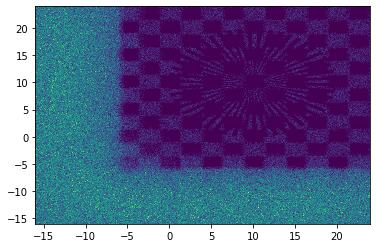

In [12]:
Xbias = 6
Ybias = 6
Foldername = "/eos/home-o/osanspla/SWAN_projects/Neutron Collimator Geometry/Pavia0"
number_of_files = int(len(os.listdir(Foldername)[1:])/3)
finalposition = []
for elem in range(1):
    countpos,countneg = 0,0
    titleTheta = Foldername+"/Testrun-of-full-sim-AngleTheta-index"+str(elem)+".txt"
    with open(titleTheta, 'r') as file:
        AnTheta = np.array(eval(file.read())) # read list string and convert to array
    file.close()

    titlePhi = Foldername+"/Testrun-of-full-sim-AnglePhi-index"+str(elem)+".txt"
    with open(titlePhi, 'r') as file:
        AnPhi = np.array(eval(file.read())) # read list string and convert to array
    file.close()

    titlePos =  Foldername+"/Testrun-of-full-sim-positionXY-index"+str(elem)+".txt"
    with open(titlePos, 'r') as file:
        Position = np.array(eval(file.read())) # read list string and convert to array
    file.close()

    for i in range(len(AnPhi)):
        impact = calculate_impact_to_object(10,50,Position[i,0]-Xbias,Position[i,1]-Ybias,AnTheta[i],AnPhi[i])
        if impact == False:
            finalposition.append(Position[i,:])
            countpos +=1
        else: 
            countneg +=1
    print("Iteration "+str(elem)+" Number of points: "+str(len(finalposition))+" Positive: "+str(countpos)+" Negative "+str(countneg))
PosXX_after = np.zeros(len(finalposition))
PosYY_after = np.zeros(len(finalposition))
for i in range(len(finalposition)):
    PosXX_after[i] = finalposition[i][0] - Xbias
    PosYY_after[i] = finalposition[i][1] - Ybias
#hist,xax,yax,image=plt.hist2d(PosXX_after,PosYY_after,400,range=[[-5, 15], [0, 20]],cmap="hot")
hist,xax,yax,image=plt.hist2d(PosXX_after,PosYY_after,400)


In [26]:
PosXX_after = np.zeros(len(finalposition))
PosYY_after = np.zeros(len(finalposition))

for i in range(len(finalposition)):
    PosXX_after[i] = finalposition[i][0]
    PosYY_after[i] = finalposition[i][1]

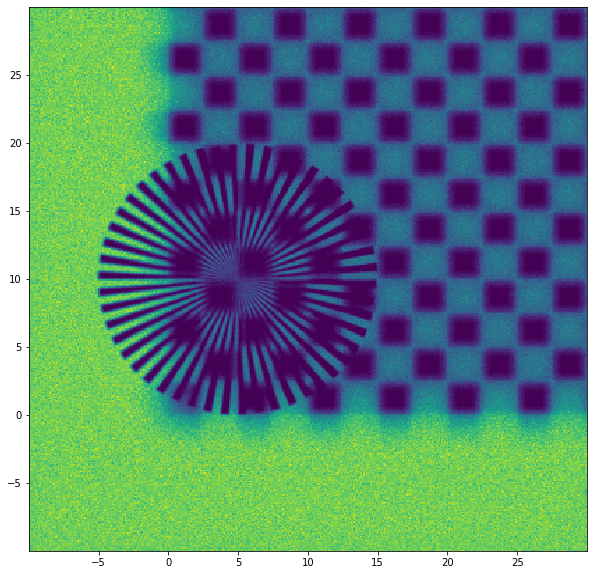

In [32]:
plt.figure(figsize=(10,10))
#hist,xax,yax,image=plt.hist2d(PosXX_after,PosYY_after,400,range=[[-5, 15], [0, 20]],cmap="hot")
hist,xax,yax,image=plt.hist2d(PosXX_after,PosYY_after,400)
plt.show()
plt.close()

Inner
[ 64.  87. 111. 106. 110. 114.  99. 113.  91. 107.  87.  98. 104. 127.
  94.  94. 108. 109. 113. 131.]
Outer
[275. 274. 259. 302. 245. 128.  34.   1.   0.   0.  11.  75. 197. 264.
 278. 291. 262. 288. 274. 277.]


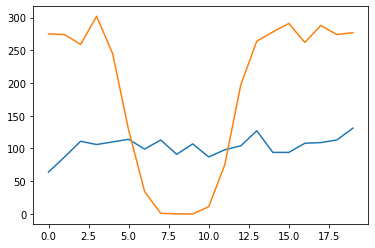

In [28]:
#plt.plot(hist[125])
plt.plot(hist[200][280:300])
plt.plot(hist[60][230:250])
print("Inner")
print(hist[200][280:300])
print("Outer")
print(hist[60][230:250])

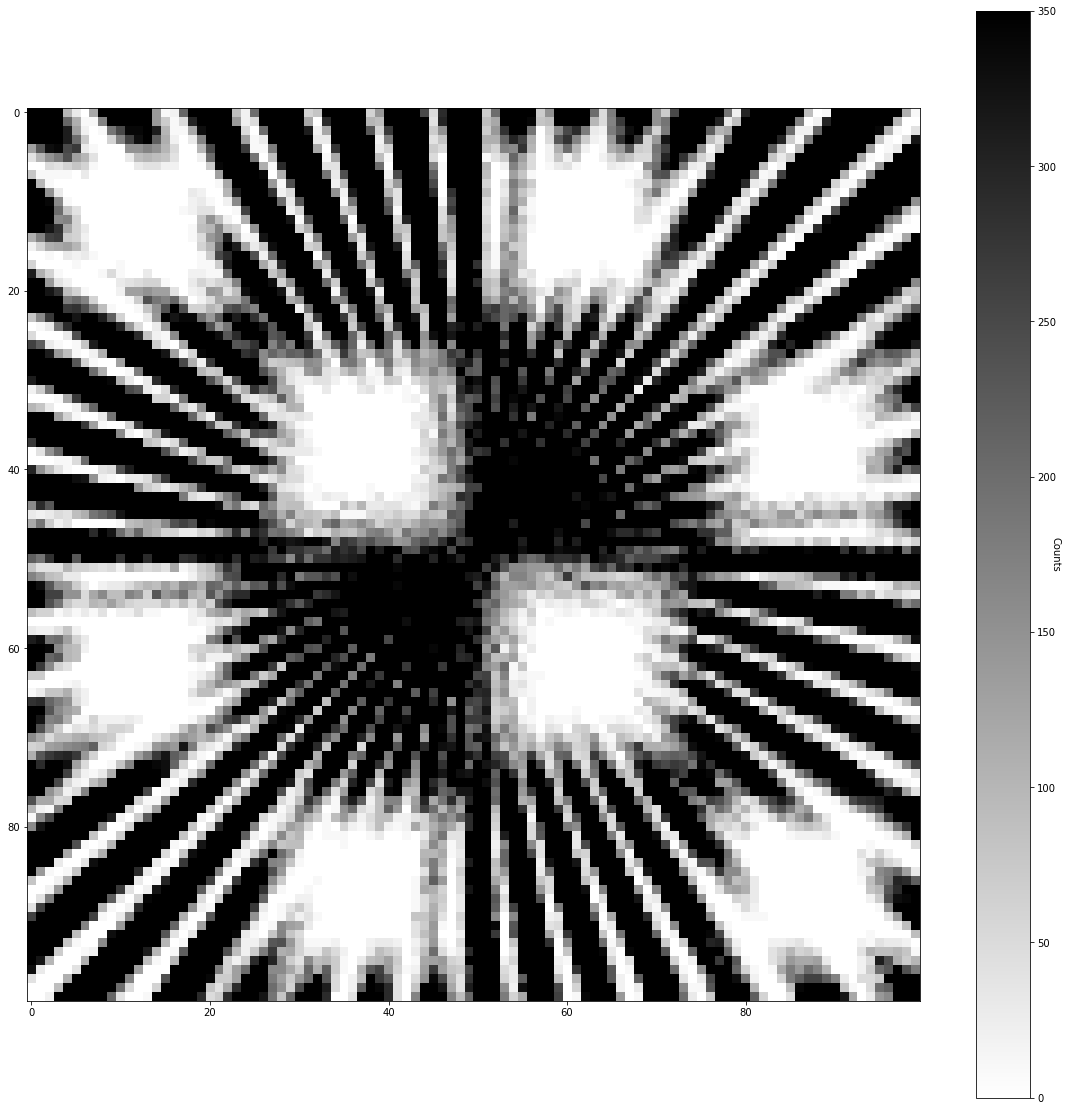

In [26]:

plt.figure(figsize=(20,20))
#plt.imshow(histtotal[50:250,100:300],cmap="hot")
plt.imshow(histtotal[100:200,150:250],cmap="binary",vmax = 350)
cbar = plt.colorbar()
cbar.set_label("Counts",rotation=270)
plt.show()
plt.close()

In [35]:
for i in range(10):
    os.system("mkdir Pavia"+str(i))